#这部分代码用于实现DWT分辨率增强方法

In [5]:
# -*- coding: utf-8 -*-
__author__ = 'Zhe'
%pylab inline
import theano
import numpy as np
import theano.tensor as T
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from skimage import io
import skimage
from theano.tensor.nnet import conv #接触theano进行卷积操作
import time
from pylab import mpl
from skimage import data
import math
from scipy.misc  import imresize #指定差值方法
#解决matlibplot当中中文显示问题
mpl.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体

Populating the interactive namespace from numpy and matplotlib


In [6]:
def psnr( img1,img2):
    img1= img1[:img2.shape[0],:img2.shape[1]]
    print img1.shape,img2.shape
    mse = numpy.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    return 20 * math.log10(np.max(img1) / math.sqrt(mse))

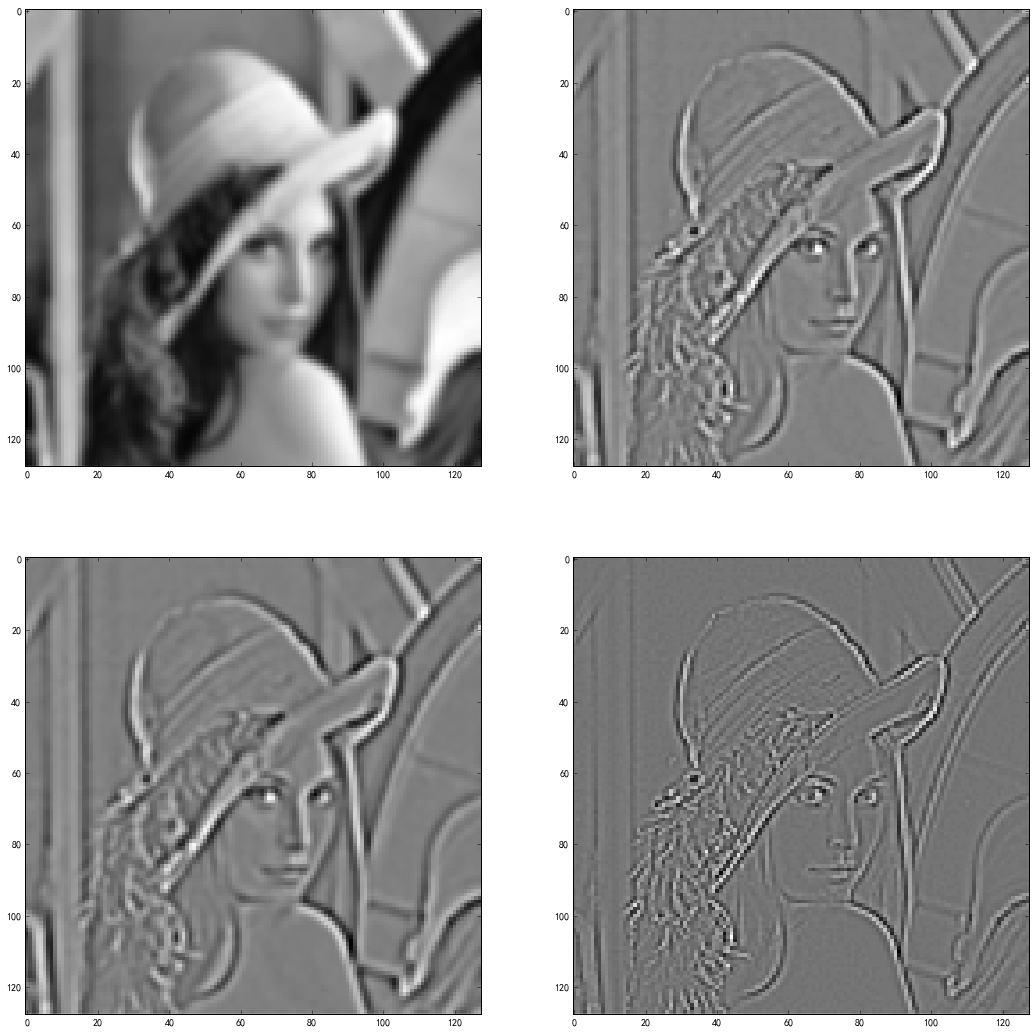

In [66]:
#得到不同分辨率的图像
imageH = skimage.color.rgb2gray(data.lena())
imageL = imresize(imageH,1/4.0,'bicubic')
image = imresize(imageL,4.0,'bicubic')
image = skimage.img_as_float(image)
from skimage.filters import gaussian_filter

plt.figure(figsize=(18,18),dpi=30)
L = gaussian_filter(image,2.0)
H = image - L

Ld = imresize(L,1/2.0,'bicubic')
Hd = imresize(H,1/2.0,'bicubic')
Ld = skimage.img_as_float(Ld)
Hd = skimage.img_as_float(Hd)

LLh = gaussian_filter(Ld,2.0)
LHh = Ld - LLh

HLh = gaussian_filter(Hd,2.0)
HHh = Hd - HLh


LL = imresize(LLh,1/2.0,'bicubic')
LH = imresize(LHh,1/2.0,'bicubic')
HL = imresize(HLh,1/2.0,'bicubic')
HH = imresize(HHh,1/2.0,'bicubic')


plt.figure(figsize=(18,18),dpi=30)
plt.subplot(2,2,1)
plt.imshow(LL, cmap=cm.gray, interpolation="none")
plt.subplot(2,2,2)
plt.imshow(LH, cmap=cm.gray, interpolation="none")
plt.subplot(2,2,3)
plt.imshow(HL, cmap=cm.gray, interpolation="none")
plt.subplot(2,2,4)
plt.imshow(HH, cmap=cm.gray, interpolation="none")

#进行DWT操作

[[157 157 156 ..., 165 165 164]
 [157 157 156 ..., 152 148 145]
 [156 156 155 ..., 127 112 105]
 ..., 
 [ 28  28  30 ...,  62  73  77]
 [ 27  27  30 ...,  74  81  84]
 [ 26  27  30 ...,  80  85  87]]
[[172 172 171 ..., 139 141 143]
 [172 172 171 ..., 130 132 132]
 [171 171 170 ..., 112 111 110]
 ..., 
 [ 20  22  24 ...,  55  60  62]
 [ 18  20  22 ...,  61  66  69]
 [ 18  20  22 ...,  64  69  72]]
90.0 0.0


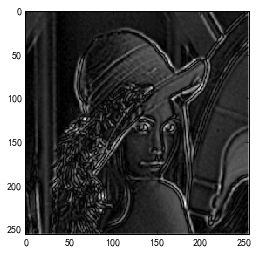

In [107]:
ILL =  imresize(LL,2.0,'bicubic')
dimage =  imresize(image,1/2.0,'bicubic')
Di = np.abs(np.asarray(dimage,dtype='float64') - np.asarray(ILL,dtype='float64'))

imshow(Di, cmap=cm.gray, interpolation="none")

print dimage
print ILL
print np.max(Di),np.min(Di)

255.0 74.0


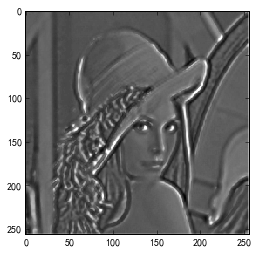

In [114]:
ILH = imresize(LH,2.0,'bicubic')
ELH = ILH+Di
mask = ELH > 255
ELH[mask] = 255

imshow(ELH, cmap=cm.gray, interpolation="none")


print np.max(ELH),np.min(ELH)

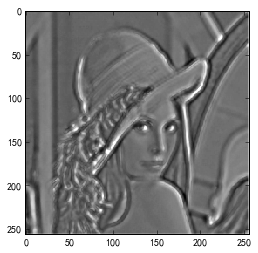

In [115]:
IHL = imresize(HL,2.0,'bicubic')
EHL = IHL+Di
mask = EHL > 255
EHL[mask] = 255
imshow(EHL, cmap=cm.gray, interpolation="none")

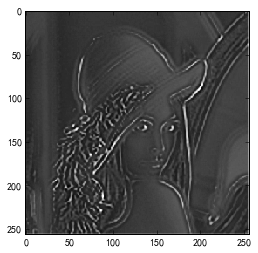

In [117]:
IHH = imresize(HH,2.0,'bicubic')
EHH = IHH+Di

mask = EHH > 255
EHH[mask] = 255
imshow(EHH, cmap=cm.gray, interpolation="none")

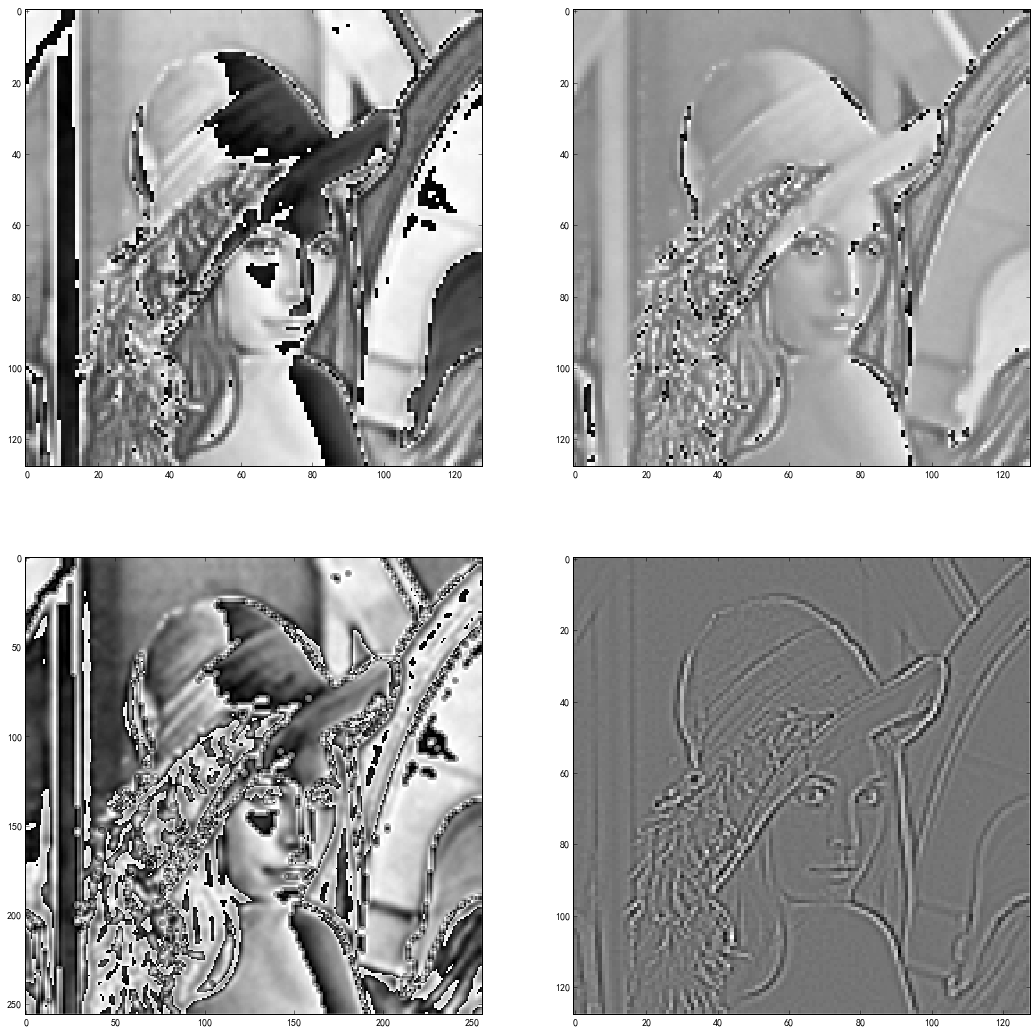

In [119]:
a = imresize(ELH,1/2.0,'bicubic')
b = imresize(EHL,1/2.0,'bicubic')
c = imresize(EHH,1/2.0,'bicubic')
d = imresize(dimage,1/2.0,'bicubic')

NL = d+a
NH = b+c
mask = NL > 255
NL[mask] = 255
mask = NH > 255
NH[mask] = 255

HNL = imresize(NL,2.0,'bicubic')
HNH = imresize(NL,2.0,'bicubic')

N = HNL + HNH

plt.figure(figsize=(18,18),dpi=30)
plt.subplot(2,2,1)
plt.imshow(NL, cmap=cm.gray, interpolation="none")
plt.subplot(2,2,2)
plt.imshow(NH, cmap=cm.gray, interpolation="none")
plt.subplot(2,2,3)
plt.imshow(N, cmap=cm.gray, interpolation="none")
plt.subplot(2,2,4)
plt.imshow(HH, cmap=cm.gray, interpolation="none")